<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Manipulation, EDA, and Reporting Results

_Authors: Joseph Nelson (DC), Sam Stack (DC)_

---

> **This lab is intentionally open-ended, and you're encouraged to answer your own questions about the dataset!**


### What makes a song a hit?

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. 

Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

**Provide (at least) a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?**

---

### Minimum Requirements

**At a minimum, you must:**

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

**You should strive to:**

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualizations

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Billboard data CSV:
billboard_csv = './datasets/billboard.csv'

# We need to use encoding='latin-1' to deal with non-ASCII characters.
df = pd.read_csv(billboard_csv, encoding='latin-1')

In [3]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

In [6]:
df.dtypes

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
x4th.week          float64
x5th.week          float64
x6th.week          float64
x7th.week          float64
x8th.week          float64
x9th.week          float64
x10th.week         float64
x11th.week         float64
x12th.week         float64
x13th.week         float64
x14th.week         float64
x15th.week         float64
x16th.week         float64
x17th.week         float64
x18th.week         float64
x19th.week         float64
x20th.week         float64
x21st.week         float64
x22nd.week         float64
x23rd.week         float64
                    ...   
x47th.week         float64
x48th.week         float64
x49th.week         float64
x50th.week         float64
x51st.week         float64
x52nd.week         float64
x

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        317 non-null object
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.week         210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week         182 no

In [9]:
df.rename(columns={'artist.inverted': 'artist name'}, inplace=True)
df.tail()

,year,artist name,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()

year              0
artist name       0
track             0
time              0
genre             0
date.entered      0
date.peaked       0
x1st.week         0
x2nd.week         5
x3rd.week        10
x4th.week        17
x5th.week        25
x6th.week        37
x7th.week        48
x8th.week        57
x9th.week        64
x10th.week       73
x11th.week       81
x12th.week       95
x13th.week      107
x14th.week      113
x15th.week      120
x16th.week      135
x17th.week      140
x18th.week      151
x19th.week      161
x20th.week      171
x21st.week      252
x22nd.week      262
x23rd.week      269
               ... 
x47th.week      312
x48th.week      313
x49th.week      313
x50th.week      313
x51st.week      313
x52nd.week      313
x53rd.week      313
x54th.week      315
x55th.week      315
x56th.week      315
x57th.week      315
x58th.week      315
x59th.week      315
x60th.week      315
x61st.week      315
x62nd.week      315
x63rd.week      315
x64th.week      315
x65th.week      316


In [11]:
df.fillna(value=0, inplace=True)

In [12]:
df.isnull().sum()

year            0
artist name     0
track           0
time            0
genre           0
date.entered    0
date.peaked     0
x1st.week       0
x2nd.week       0
x3rd.week       0
x4th.week       0
x5th.week       0
x6th.week       0
x7th.week       0
x8th.week       0
x9th.week       0
x10th.week      0
x11th.week      0
x12th.week      0
x13th.week      0
x14th.week      0
x15th.week      0
x16th.week      0
x17th.week      0
x18th.week      0
x19th.week      0
x20th.week      0
x21st.week      0
x22nd.week      0
x23rd.week      0
               ..
x47th.week      0
x48th.week      0
x49th.week      0
x50th.week      0
x51st.week      0
x52nd.week      0
x53rd.week      0
x54th.week      0
x55th.week      0
x56th.week      0
x57th.week      0
x58th.week      0
x59th.week      0
x60th.week      0
x61st.week      0
x62nd.week      0
x63rd.week      0
x64th.week      0
x65th.week      0
x66th.week      0
x67th.week      0
x68th.week      0
x69th.week      0
x70th.week      0
x71st.week

In [13]:
df.tail()

,year,artist name,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,99,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.index

RangeIndex(start=0, stop=317, step=1)

In [17]:
df.sort_values('date.entered').tail()

,year,artist name,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
232,2000,Nine Days,If I Am,4:18,Rock,2000-12-02,2000-12-02,68,68.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,2000,Vitamin C,The Itch,3:30,Rock,2000-12-02,2000-12-16,86,48.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259,2000,"Clark, Terri",A Little Gasoline,3:07,Country,2000-12-16,2000-12-16,75,82.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,2000,De La Soul,All Good?,5:02,Rap,2000-12-23,2000-12-23,96,96.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309,2000,Tuesday,I Know,4:06,Rock,2000-12-30,2000-12-30,98,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df['x1st.week'].describe()

count    317.000000
mean      79.958991
std       14.686865
min       15.000000
25%       74.000000
50%       81.000000
75%       91.000000
max      100.000000
Name: x1st.week, dtype: float64

In [21]:
df['x70th.week'].describe()

count    317.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: x70th.week, dtype: float64

In [33]:
df.loc[:, 'year':'date.peaked']

,year,artist name,track,time,genre,date.entered,date.peaked
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04


In [35]:
df['date.entered'] = pd.to_datetime(df['date.entered'])
df['date.peaked'] = pd.to_datetime(df['date.peaked'])

In [36]:
df.dtypes

year                     int64
artist name             object
track                   object
time                    object
genre                   object
date.entered    datetime64[ns]
date.peaked     datetime64[ns]
x1st.week                int64
x2nd.week              float64
x3rd.week              float64
x4th.week              float64
x5th.week              float64
x6th.week              float64
x7th.week              float64
x8th.week              float64
x9th.week              float64
x10th.week             float64
x11th.week             float64
x12th.week             float64
x13th.week             float64
x14th.week             float64
x15th.week             float64
x16th.week             float64
x17th.week             float64
x18th.week             float64
x19th.week             float64
x20th.week             float64
x21st.week             float64
x22nd.week             float64
x23rd.week             float64
                     ...      
x47th.week             float64
x48th.we

In [38]:
df['date.peaked'] - df['date.entered']

0      56 days
1      56 days
2      98 days
3      35 days
4      70 days
5      70 days
6      84 days
7      84 days
8      49 days
9     273 days
10     84 days
11     49 days
12    175 days
13    182 days
14     91 days
15     84 days
16     70 days
17    168 days
18    105 days
19     91 days
20     49 days
21     98 days
22     42 days
23     98 days
24    217 days
25    112 days
26     77 days
27    126 days
28    182 days
29    112 days
        ...   
287     7 days
288    70 days
289     7 days
290    63 days
291     7 days
292    14 days
293    21 days
294     7 days
295    49 days
296    21 days
297    21 days
298     7 days
299     0 days
300    49 days
301     0 days
302     7 days
303    35 days
304    21 days
305     7 days
306     0 days
307     7 days
308     0 days
309     0 days
310     7 days
311     0 days
312     0 days
313     0 days
314     0 days
315     0 days
316     0 days
Length: 317, dtype: timedelta64[ns]

In [40]:
df['days popular'] = df['date.peaked'] - df['date.entered']

In [41]:
df.tail()

,year,artist name,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,days popular
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 days
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 days
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 days
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 days
316,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,99,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 days


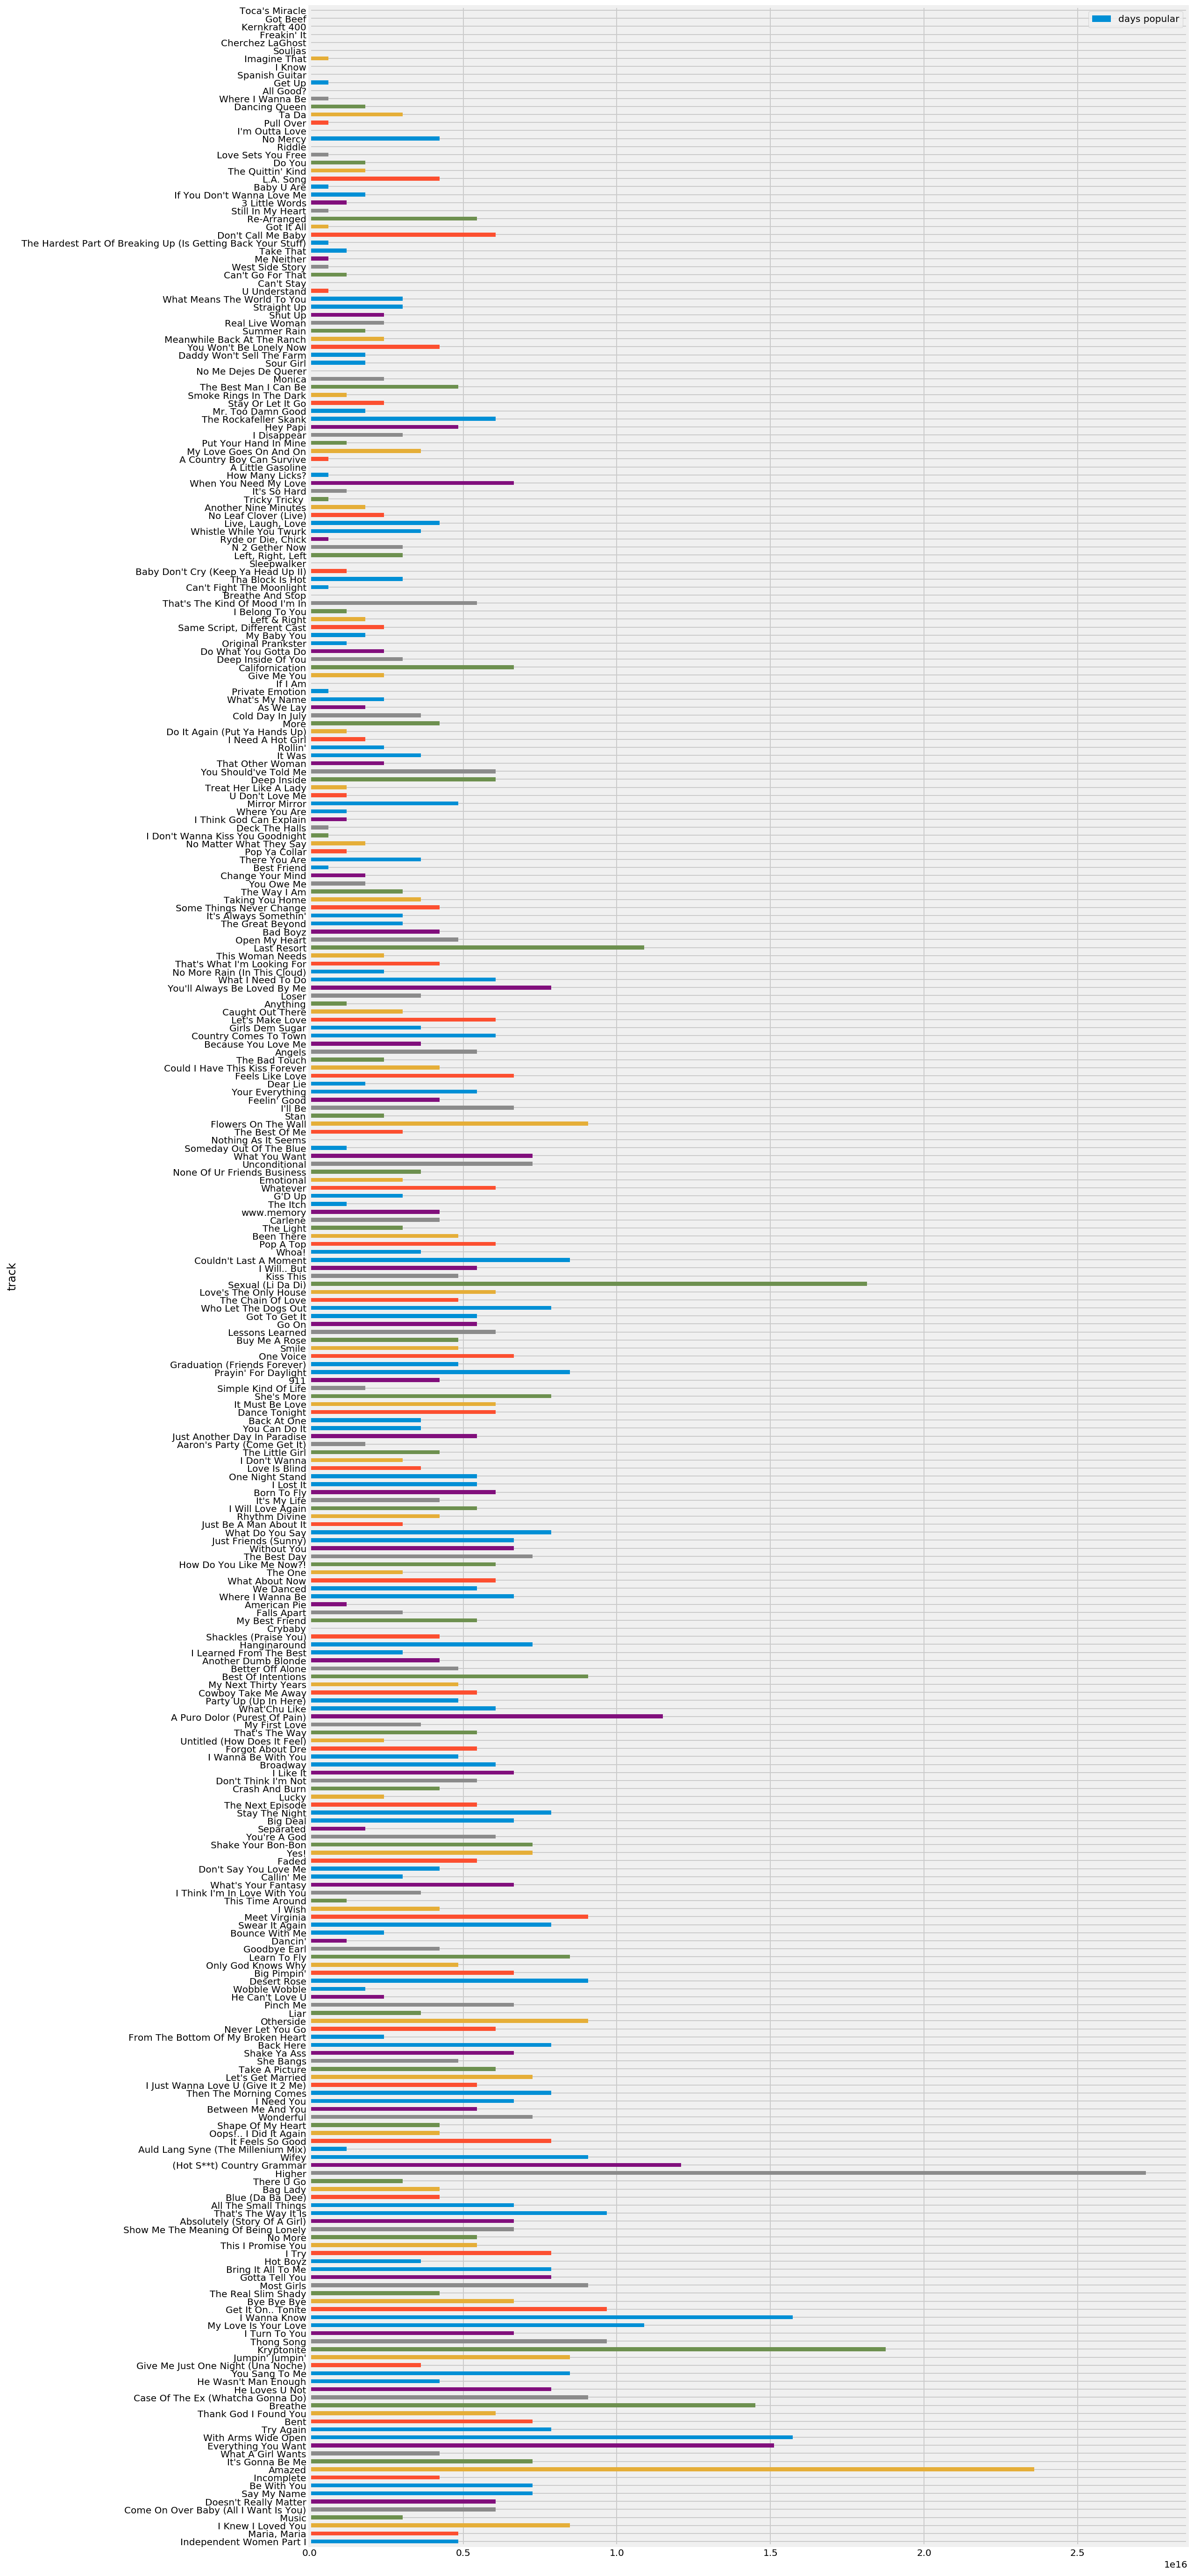

In [46]:
df.plot(kind= 'barh', x='track', y='days popular', figsize=(15,50))